# Clustering Iris classification 
<div>Task 2 - The Sparks Foundation Internship</div>
<div>Clustering Algorithms</div>
<strong>Name: </strong> <span>Ammar Sayed</span>

#### 1. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

SEED = 42
np.random.seed(SEED)

#### 2. Read data

In [192]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 3. Explore data

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As we see, we're working with only one categorical feature which is Species

In [194]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing values, that's great 🎉

#### 4. Data Visualization

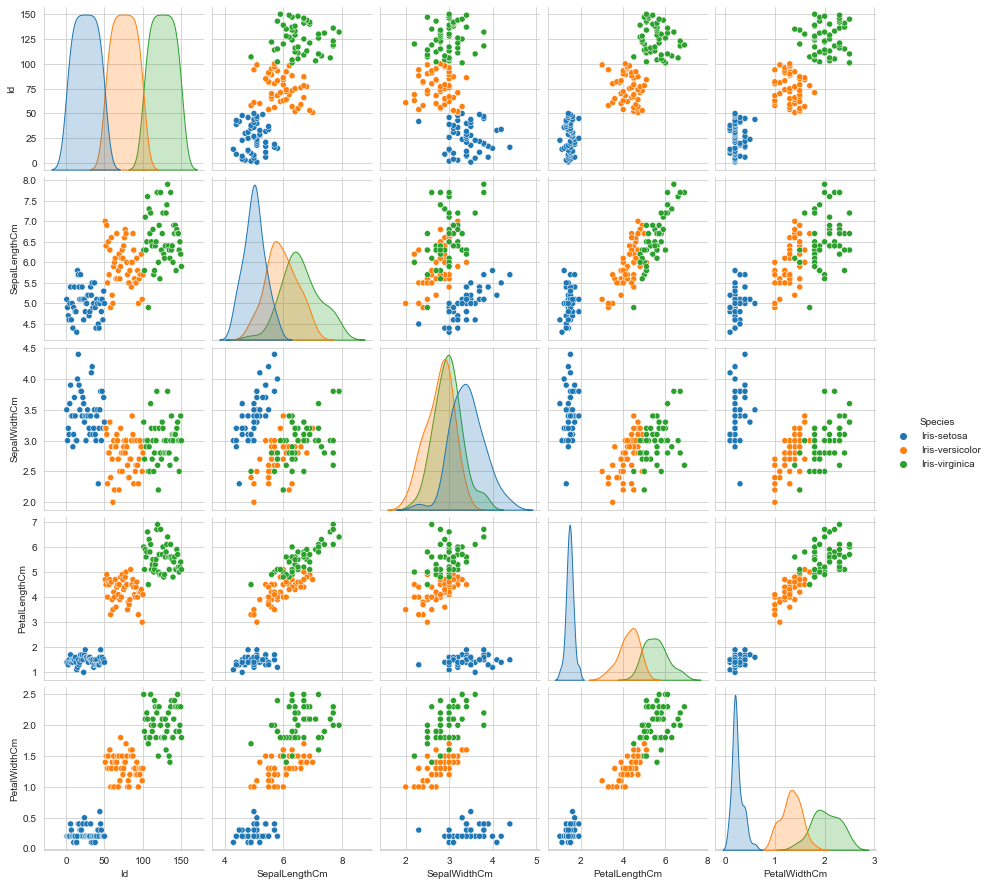

In [209]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Species')

From the following graph We notice the following
1. SepalLength and PetalLength features are positive correlated, after them PetalWidth is less Correlated but with good measure
2. SepalWidth has no good correlation with other features
3. PetalLength vs. PetalWidth are good correlated

<AxesSubplot:xlabel='Species', ylabel='count'>

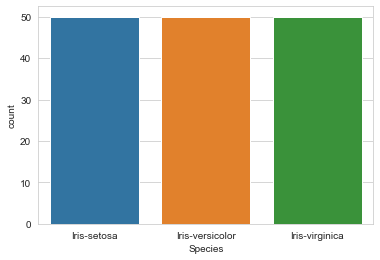

In [211]:
sns.countplot(x=df['Species'])

<strong style="color: green">Great!!</strong> the data is **balanced**, no worry about data oversampling or downsampling

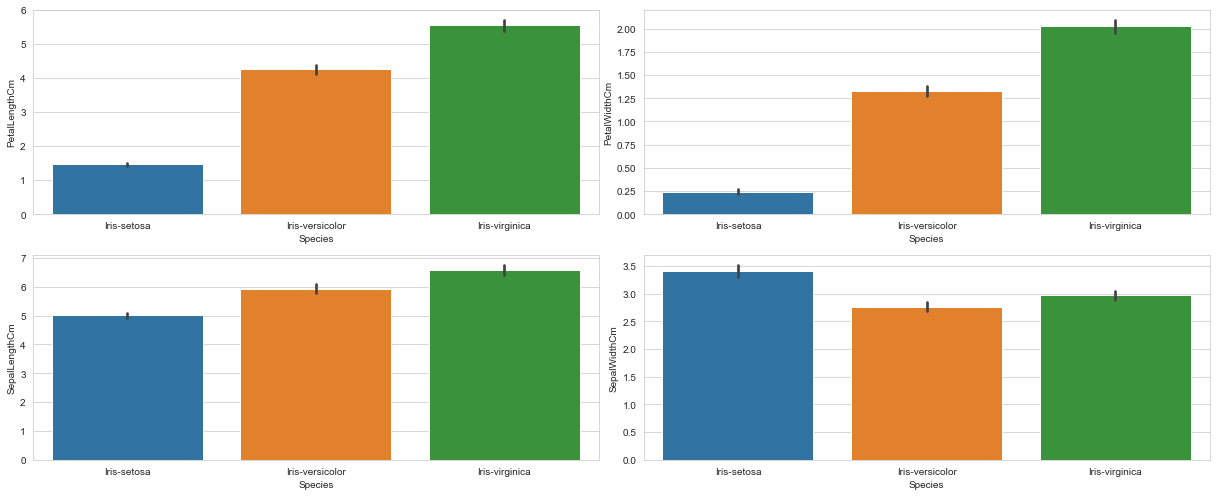

In [214]:
plt.figure(figsize=(17, 7))
plt.subplot(2,2, 1)
sns.barplot(x=df['Species'], y=df['PetalLengthCm'])
plt.subplot(2,2, 2)
sns.barplot(x=df['Species'], y=df['PetalWidthCm'])
plt.subplot(2,2, 3)
sns.barplot(x=df['Species'], y=df['SepalLengthCm'])
plt.subplot(2,2, 4)
sns.barplot(x=df['Species'], y=df['SepalWidthCm'])
plt.tight_layout()

As we see the most existing iris flower is iris-Virginica after that Iris-Versicolor one

In [123]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### 5. Split the data

In [196]:
y = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


X = df.drop(['Species', 'Id'], axis=1) # drop [Species, id] features
X.shape, y.shape

((150, 4), (150,))

In [198]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

print(f'Train: X = {x_train.shape}, y = {y_train.shape}')
print(f'Test: X = {x_test.shape}, y = {y_test.shape}')

Train: X = (120, 4), y = (120,)
Test: X = (30, 4), y = (30,)


#### 6. Scale the data

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print(f'Train Scaled: {x_train_scaled[0]}')
print(f'Test Scaled: {x_test_scaled[0]}')

Train Scaled: [0.08823529 0.66666667 0.         0.04166667]
Test Scaled: [0.52941176 0.33333333 0.64912281 0.45833333]


#### 7. Build KMeans Model

##### 7.1 Detect the best K clusters for the dataset

###### **7.1.1     using _inertia with elbow method**

c:\Users\ammar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

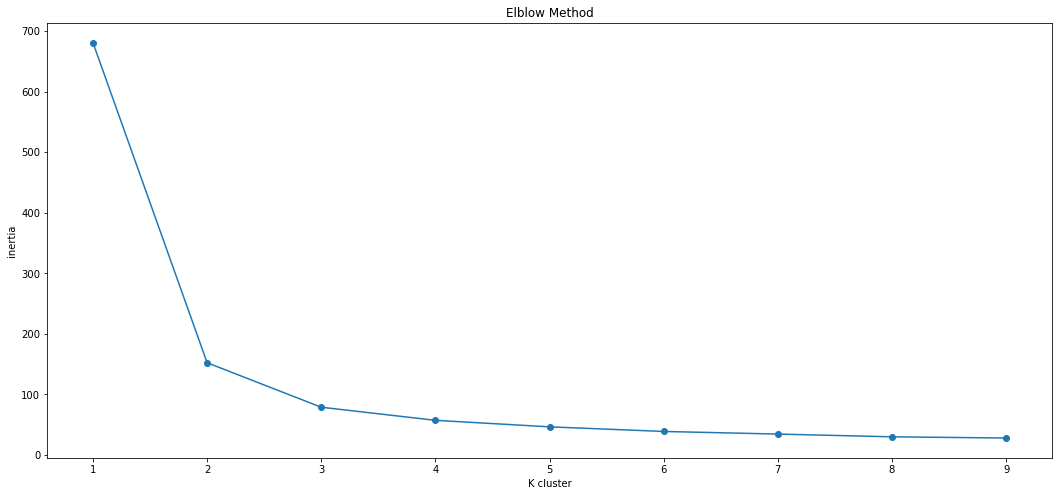

In [207]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=SEED)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(18, 8))
ks = np.arange(1, 10)
plt.plot(ks, wcss, '-o')
plt.title('Elblow Method')
plt.xlabel('K cluster')
plt.ylabel('inertia')

As we see from the Elbow Method, the best number of clusters is K = 3

<strong>Build KMeans with K = 3</strong>

In [241]:
X = X.values

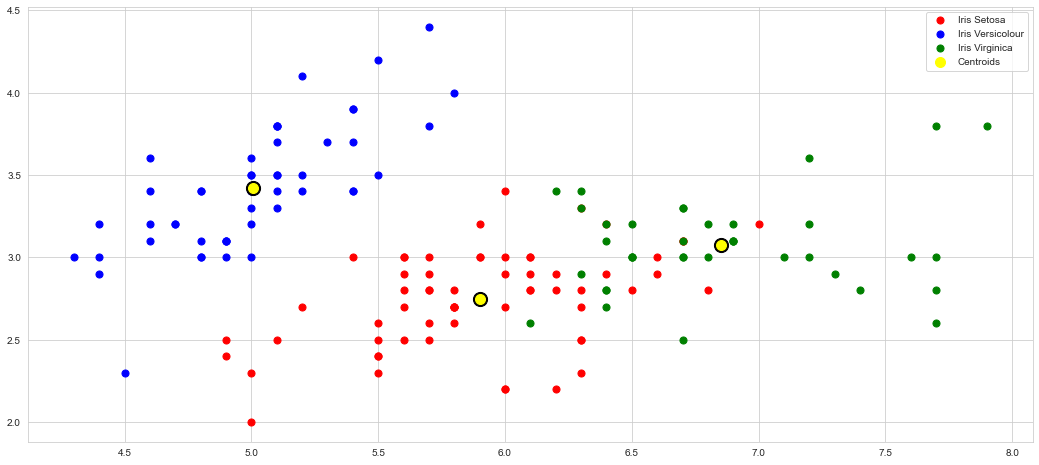

In [258]:
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)


# Visualize the data
fig = plt.figure(figsize=(18, 8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=50, c='red', label='Iris Setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=50, c='blue', label='Iris Versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=50, c='green', label='Iris Virginica')

# plot Clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()

There is interference between iris virginica and versicolor, but that's okay it's not a big deal

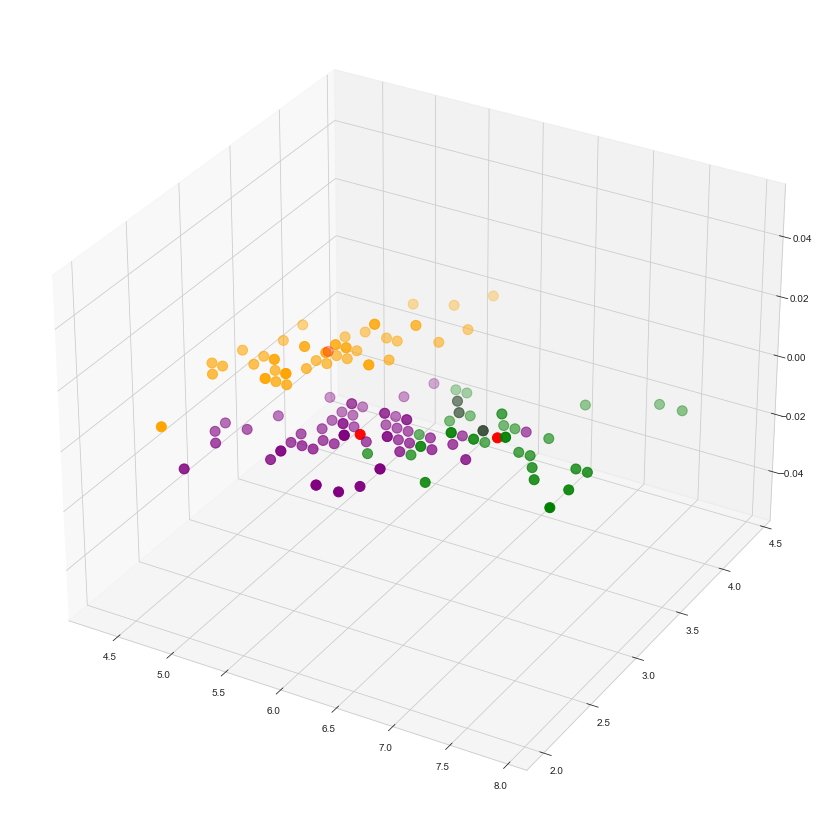

In [255]:
# 3d Visualization 
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

<h3 style="text-align: center; font-weight: bold">
    <span style="color: gray">THANK</span> 
    <span style="color: darkred">YOU!</span>
</h3>
<h5 style="text-align: center;">❤️🙋‍♂️ SEE YOU LATER 🙋‍♂️❤️</h5>